# Importamos librerías

In [67]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [111]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [69]:
tf.test.is_gpu_available()

True

# Importamos los datos con los atributos

In [70]:
df=pd.read_csv('../../Data/Processed/atributes_wd.csv')
df

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
0,000001.jpg,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,000002.jpg,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,000004.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,000005.jpg,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
202595,202596.jpg,0,0,0,0,1,1,0,0,1,...,1,0,1,0,0,0,0,1,0,1
202596,202597.jpg,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,0,0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,1


In [71]:
columns_names = df.columns.values
columns_names = np.delete(columns_names, 0)
contador_0 = 0
contador_1 = 0
for columnas in columns_names: 
    contador_0 = contador_0 + df[columnas].value_counts()[0]
    contador_1 = contador_1 + df[columnas].value_counts()[1]

In [72]:
contador_0

5116313

In [73]:
contador_1

1366855

In [74]:
contador_0/(contador_0+contador_1)

0.7891686595195435

# Separamos datos de validación-entrenamiento y datos de prueba

## Creamos datos de validación-entrenamiento

In [75]:
df_tv = df.sample(frac=0.9,random_state = 1)
df_tv

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
57205,057206.jpg,0,1,0,0,0,1,0,0,1,...,1,1,0,1,0,1,0,0,1,1
75512,075513.jpg,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,1
193254,193255.jpg,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
125591,125592.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
75806,075807.jpg,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92660,092661.jpg,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,1,0,1
40005,040006.jpg,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
98210,098211.jpg,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
25067,025068.jpg,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


## Juntamos atributos e imágenes de los datos de validación-entrenamiento

In [76]:
files = tf.data.Dataset.from_tensor_slices(df_tv['Image'])
attributes = tf.data.Dataset.from_tensor_slices(df_tv.iloc[:,1:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


In [77]:
path_to_images = '../../Data/Processed/img_align_celeba/'
def process_file(file_name, attributes): 
    image = tf.io.read_file(path_to_images+file_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [178,218])
    image /= 255.0 
    return image, attributes

In [78]:
labeled_images = data.map(process_file)
print(labeled_images)

<MapDataset element_spec=(TensorSpec(shape=(178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


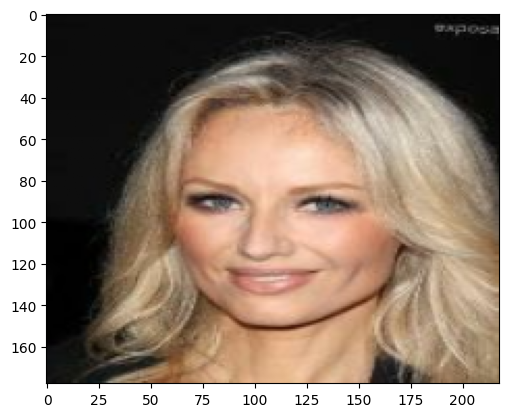

tf.Tensor([0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1], shape=(32,), dtype=int64)


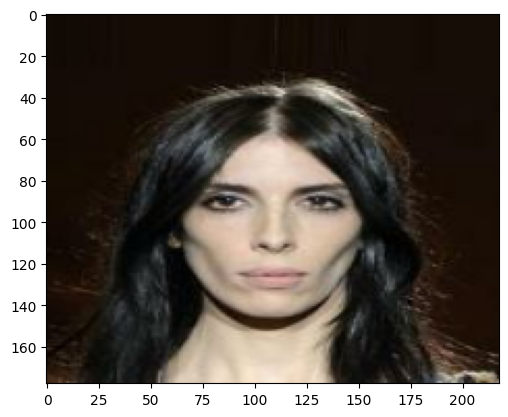

tf.Tensor([0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1], shape=(32,), dtype=int64)


In [79]:
for image, attri in labeled_images.take(2): 
    plt.imshow(image)
    plt.show()
    print(attri)

## Creamos datos de prueba

In [80]:
df_test = df.drop(df_tv.index)
df_test

,Image,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Straight_Hair,Wavy_Hair,Young
9,000010.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
27,000028.jpg,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
48,000049.jpg,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
52,000053.jpg,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
60,000061.jpg,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202566,202567.jpg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
202570,202571.jpg,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
202575,202576.jpg,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,1
202579,202580.jpg,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1


## Juntamos atributos e imágenes de los datos de prueba

In [81]:
files_test = tf.data.Dataset.from_tensor_slices(df_test['Image'])
attributes_test = tf.data.Dataset.from_tensor_slices(df_test.iloc[:,1:].to_numpy())
data_test = tf.data.Dataset.zip((files_test, attributes_test))
print(data_test)

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


In [82]:
path_to_images = '../../Data/Processed/img_align_celeba/'
def process_file_test(file_name_test, attributes_test): 
    image_test = tf.io.read_file(path_to_images+file_name_test)
    image_test = tf.image.decode_jpeg(image_test, channels=3)
    image_test = tf.image.resize(image_test, [178,218])
    image_test /= 255.0 
    return image_test, attributes_test

In [83]:
labeled_images_test = data_test.map(process_file_test)
print(labeled_images_test)

<MapDataset element_spec=(TensorSpec(shape=(178, 218, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>


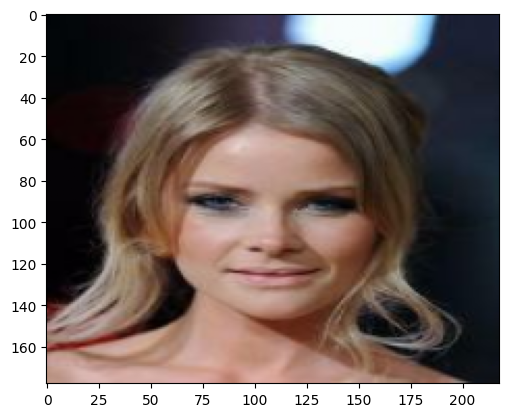

tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1], shape=(32,), dtype=int64)


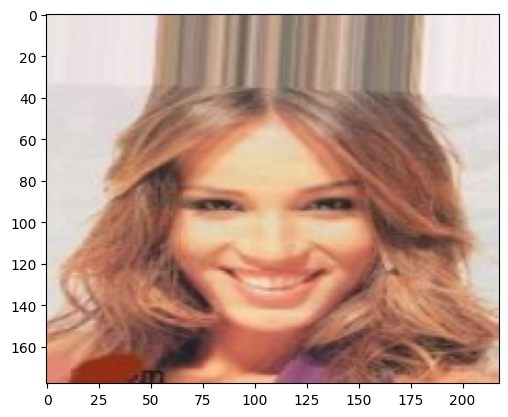

tf.Tensor([0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1], shape=(32,), dtype=int64)


In [84]:
for image_test, attri in labeled_images_test.take(2): 
    plt.imshow(image_test)
    plt.show()
    print(attri)

# Separamos Train y Val

In [152]:
image_count = len(labeled_images)
image_count
train_size = int(image_count * 0.8)
train = labeled_images.take(train_size)
val = labeled_images.skip(train_size)
print(tf.data.experimental.cardinality(train).numpy())
print(tf.data.experimental.cardinality(val).numpy())

145871
36468


In [153]:
batch_size = 150
AUTOTUNE = tf.data.AUTOTUNE

def configure_for_performance(ds):
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train = configure_for_performance(train)
val = configure_for_performance(val)

# Creación del modelo

In [154]:
def activation_prop(sal):
    if sal>0: 
        return(1)
    else: 
        return(0)

In [155]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(178,218,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=4, kernel_size=(1, 1), activation='relu'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


In [156]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_245 (Conv2D)         (None, 176, 216, 32)      896       
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 88, 108, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_246 (Conv2D)         (None, 86, 106, 64)       18496     
                                                                 
 average_pooling2d_109 (Aver  (None, 43, 53, 64)       0         
 agePooling2D)                                                   
                                                                 
 conv2d_247 (Conv2D)         (None, 41, 51, 32)        18464     
                                                                 
 average_pooling2d_110 (Aver  (None, 20, 25, 32)     

In [157]:
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics='binary_accuracy')

In [ ]:
epochs = 100
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 3)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
history = model.fit(train, validation_data=val, epochs= epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/100
973/973 [==============================] - 171s 176ms/step - loss: 0.4572 - binary_accuracy: 0.8255 - val_loss: 0.4552 - val_binary_accuracy: 0.8273 - lr: 0.0010
Epoch 2/100
973/973 [==============================] - 169s 174ms/step - loss: 0.4549 - binary_accuracy: 0.8268 - val_loss: 0.4549 - val_binary_accuracy: 0.8273 - lr: 9.0000e-04
Epoch 3/100
973/973 [==============================] - 168s 173ms/step - loss: 0.4543 - binary_accuracy: 0.8271 - val_loss: 0.4549 - val_binary_accuracy: 0.8273 - lr: 8.1000e-04
Epoch 4/100
973/973 [==============================] - 168s 173ms/step - loss: 0.4543 - binary_accuracy: 0.8271 - val_loss: 0.4549 - val_binary_accuracy: 0.8273 - lr: 7.2900e-04
Epoch 5/100
787/973 [=======================>......] - ETA: 27s - loss: 0.4542 - binary_accuracy: 0.8271